<a href="https://colab.research.google.com/github/nyulnyul/FootballValues/blob/main/footballvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas openpyxl

#데이터 전처리 과정

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from google.colab import drive

In [5]:
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/football.xlsx'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##파일 존재 여부 파악

파일이 존재합니다.
파일이 성공적으로 불러와졌습니다.
           Player  Nation    Pos   Age  Playing Time_MP  \
0    Remo Freuler  ch SUI     MF  26.0             39.0   
1      Papu Gómez  ar ARG  MF,FW  30.0             40.0   
2   Hans Hateboer  nl NED     DF  24.0             39.0   
3    Duván Zapata  co COL     FW  27.0             42.0   
4  Marten de Roon  nl NED     MF  27.0             39.0   

   Playing Time.1_Starts  Playing Time.2_Min  Playing Time.3_90s  \
0                   39.0              3349.0                37.2   
1                   39.0              3344.0                37.2   
2                   37.0              3333.0                37.0   
3                   37.0              3333.0                37.0   
4                   38.0              3328.0                37.0   

   Performance_Gls  Performance.1_Ast  ...  Per 90 Minutes.4_G+A-PK  \
0              2.0                6.0  ...                     0.21   
1              9.0               11.0  ...                     0

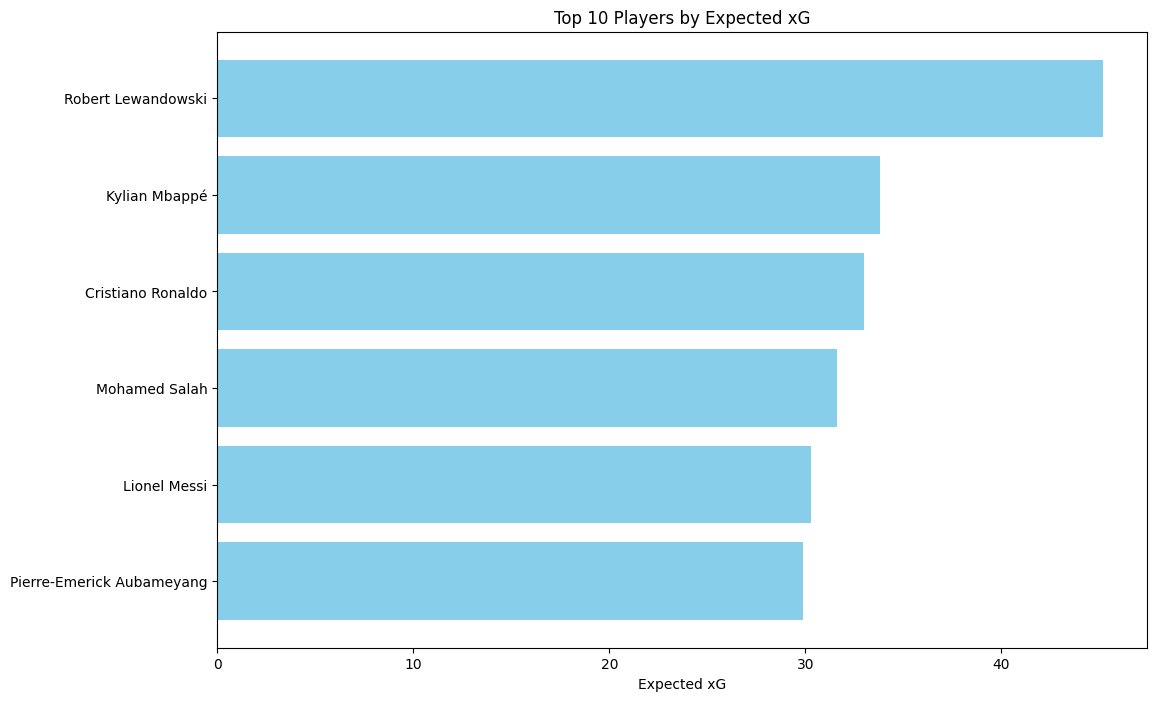

In [6]:
if os.path.exists(file_path):
    print("파일이 존재합니다.")
    try:
        # Excel 파일 불러오기
        df = pd.read_excel(file_path)
        print("파일이 성공적으로 불러와졌습니다.")

        # 데이터의 첫 몇 줄을 확인하여 구조 파악
        print(df.head())

        # 결측값 처리
        print("결측값 처리 전 각 열의 결측값 수:")
        print(df.isnull().sum())
        df.fillna(0, inplace=True)

        # 가장 높은 시장 가치를 가진 선수 찾기
        max_value_player = df.loc[df['Expected_xG'].idxmax()]  # Expected_xG 열을 사용하여 가장 높은 시장 가치를 가진 선수를 찾음
        print("가장 높은 시장 가치를 지닌 선수 정보:")
        print(max_value_player)

        # 시장 가치 상위 10명의 선수 시각화
        top_10_players = df.nlargest(10, 'Expected_xG')  # Expected_xG 열을 사용하여 시장 가치 상위 10명의 선수를 찾음

        plt.figure(figsize=(12, 8))
        plt.barh(top_10_players['Player'], top_10_players['Expected_xG'], color='skyblue')  # Expected_xG 열을 사용하여 시장 가치를 시각화
        plt.xlabel('Expected xG')
        plt.title('Top 10 Players by Expected xG')
        plt.gca().invert_yaxis()
        plt.show()

    except Exception as e:
        print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


In [7]:
df.head()

,Player,Nation,Pos,Age,Playing Time_MP,Playing Time.1_Starts,Playing Time.2_Min,Playing Time.3_90s,Performance_Gls,Performance.1_Ast,...,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s
0,Remo Freuler,ch SUI,MF,26.0,39.0,39.0,3349.0,37.2,2.0,6.0,...,0.21,0.10,0.12,0.21,0.10,0.21,0.0,0.0,0.0,0.0
1,Papu Gómez,ar ARG,"MF,FW",30.0,40.0,39.0,3344.0,37.2,9.0,11.0,...,0.54,0.26,0.40,0.66,0.26,0.66,0.0,0.0,0.0,0.0
2,Hans Hateboer,nl NED,DF,24.0,39.0,37.0,3333.0,37.0,5.0,5.0,...,0.27,0.16,0.15,0.31,0.16,0.31,0.0,0.0,0.0,0.0
3,Duván Zapata,co COL,FW,27.0,42.0,37.0,3333.0,37.0,26.0,8.0,...,0.89,0.59,0.30,0.88,0.54,0.83,0.0,0.0,0.0,0.0
4,Marten de Roon,nl NED,MF,27.0,39.0,38.0,3328.0,37.0,3.0,3.0,...,0.14,0.05,0.06,0.11,0.03,0.09,0.0,0.0,0.0,0.0


In [9]:
# 컬럼 이름을 한글로 변경
df.columns = [
    '선수', '국가', '포지션', '나이', '출전 경기 수', '선발 출전 수', '출전 시간 (분)', '풀타임 경기 수',
    '득점 수', '도움 수', '득점+도움 수', '필드골 (페널티 제외)', '페널티 득점', '페널티 시도', '경고 (옐로 카드)', '퇴장 (레드 카드)',
    '기대 득점', '기대 득점 (페널티 제외)', '기대 도움', '기대 득점+기대 도움 (페널티 제외)', '공 진척 (드리블)', '패스 진척', '달리기 진척',
    '90분당 득점', '90분당 도움', '90분당 득점+도움', '90분당 필드골 (페널티 제외)', '90분당 득점+도움 (페널티 제외)',
    '90분당 기대 득점', '90분당 기대 도움', '90분당 기대 득점+도움', '90분당 기대 득점 (페널티 제외)', '90분당 기대 득점+기대 도움 (페널티 제외)',
    '출전 경기 수', '선발 출전 수', '출전 시간 (분)', '풀타임 경기 수'
]

# 데이터프레임 확인
print(df.head())

               선수      국가    포지션    나이  출전 경기 수  선발 출전 수  출전 시간 (분)  풀타임 경기 수  \
0    Remo Freuler  ch SUI     MF  26.0     39.0     39.0     3349.0      37.2   
1      Papu Gómez  ar ARG  MF,FW  30.0     40.0     39.0     3344.0      37.2   
2   Hans Hateboer  nl NED     DF  24.0     39.0     37.0     3333.0      37.0   
3    Duván Zapata  co COL     FW  27.0     42.0     37.0     3333.0      37.0   
4  Marten de Roon  nl NED     MF  27.0     39.0     38.0     3328.0      37.0   

   득점 수  도움 수  ...  90분당 득점+도움 (페널티 제외)  90분당 기대 득점  90분당 기대 도움  \
0   2.0   6.0  ...                 0.21        0.10        0.12   
1   9.0  11.0  ...                 0.54        0.26        0.40   
2   5.0   5.0  ...                 0.27        0.16        0.15   
3  26.0   8.0  ...                 0.89        0.59        0.30   
4   3.0   3.0  ...                 0.14        0.05        0.06   

   90분당 기대 득점+도움  90분당 기대 득점 (페널티 제외)  90분당 기대 득점+기대 도움 (페널티 제외)  출전 경기 수  \
0           0.21                 